# **1번과제 관심 있는 주제 데이터 찾기 **
 * 데이터명 : dementia_dataset
 * 데이터 특징
   - 출처 : kaggle (https://www.kaggle.com/datasets/shashwatwork/dementia-prediction-dataset )
   - 분야 : 의료
   - 내용 : 60~96세의 환자를 장기추적하여 치매에 대한 연구를 위해 기록 됨. 각 기록에는 1년 이상의 텀이 있으며 비치매 vs 치매 vs 전환군이 있어 비교가 용이하며 방문 회숫(visit) 변수가 있어 시간에 따른 변화를 아는 데 용이합니다.
   - 위 데이터는 코호트(장기 추적) 데이터로 특정 집단을 시간을 두고 기록해 경과를 확인하고 이를 통해 예측 혹은 대상을 연구하는 데 용이하게 쓰입니다. 코호트 데이터는 주로 의학 분야뿐만 아니라 마케팅,고객 관리, 환경 등의 분야에서도 유용하게 사용됩니다.
   - 이런 장기 추적 데이터는 특정 시점에서 한번 측정하여 상태를 파악하는 데이터와는 다르게 시간 간격을 두고 특정한 집단을 대상으로 측정하기에 인과 관계 파악에 유용합니다. 예를 들어 금융/마케팅 분야에서는 고객의 이탈 시점,원인을 분석,예측하여 전략을 수립할 수 있습니다. 하지만 이런 데이터는 국내의 공공데이터 포탈에서는 구하기 쉽지 않다는 단점이 있습니다.

# **2번 과제**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='Malgun Gothic' )
!pip install koreanize-matplotlib

import koreanize_matplotlib
import seaborn as sns

In [2]:
data=pd.read_csv("data/Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **1. 결측치 확인**

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **1-1 "Age"변수에서 결측치가 있는 것 뽑아서 확인해보기 -> 별다른 특이사항 x**

In [4]:
print(data.loc[data["Age"].isnull(),].describe())
print("-----------")
print(data.loc[data["Age"].isnull(),].describe(include="object" ))

       PassengerId    Survived      Pclass  Age       SibSp       Parch  \
count   177.000000  177.000000  177.000000  0.0  177.000000  177.000000   
mean    435.581921    0.293785    2.598870  NaN    0.564972    0.180791   
std     250.552901    0.456787    0.763216  NaN    1.626316    0.534145   
min       6.000000    0.000000    1.000000  NaN    0.000000    0.000000   
25%     230.000000    0.000000    3.000000  NaN    0.000000    0.000000   
50%     452.000000    0.000000    3.000000  NaN    0.000000    0.000000   
75%     634.000000    1.000000    3.000000  NaN    0.000000    0.000000   
max     889.000000    1.000000    3.000000  NaN    8.000000    2.000000   

             Fare  
count  177.000000  
mean    22.158567  
std     31.874608  
min      0.000000  
25%      7.750000  
50%      8.050000  
75%     24.150000  
max    227.525000  
-----------
                    Name   Sex    Ticket Cabin Embarked
count                177   177       177    19      177
unique              

## **1-2 탑승지가 결측치인 값 확인 -> 티켓 번호가 같음**

In [5]:
data.loc[data["Embarked"].isnull(),] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
data.loc[data["Ticket"]=="113572",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
data.loc[data["Cabin"]=="B28",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


* 탑승지가 결측치인 두 사람과 티켓번호, 객실이 같은 사람이 있는지 확인해보려 했지만 위 두사람 외에는 관측 되지 않음. 따라서 둘은 일행으로 판단 가능

# **2. 전반부, 후반부 확인**  

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
data.shape

(891, 12)

In [11]:
data.loc[data.duplicated(),] #중복된 것도 없구나

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# **3. info()로 변수 타입 확인 -> describe()로 살펴보기**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# **4. 변수별로 데이터 살펴보기**
 * PassengerId , Name 변수는 개인 식별코드로 작용하기에 제외하고 진행

In [15]:
data1=data.copy()
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## **4-1. "Survived"** 
 * 숫자형 자료로 되어 있지만 0,1로만 되어 있으므로 범주형 자료로 해석 필요
 * 결측치 없으며 특이사항 x

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: title={'center': 'Survived'}, xlabel='Survived'>

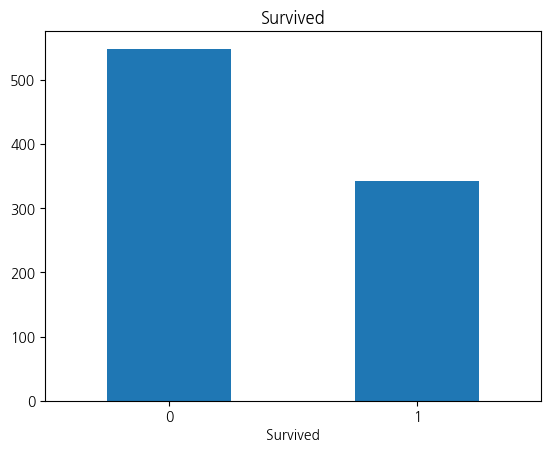

In [40]:
print(data1["Survived"].value_counts())
data1["Survived"].value_counts().plot(kind="bar",rot=0, title="Survived")

## **4-2 'Pclass' - 티켓의 등급**
 * 마찬가지로 숫자형으로 되어 있지만 1,2,3으로만 표시 되어 있어 범주형 자료로 해석 필요
 * 결측치 없음
 * Fare, Cabin이랑 연계해서 상관관계 분석 가능
 * 생존 유무와 관계가 있는지 분석 가능

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
---------------
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

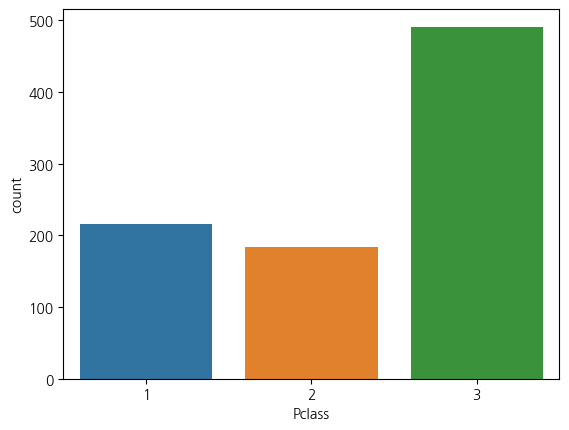

In [44]:
print(data1["Pclass"].value_counts())
print("---------------")
print(data1["Pclass"].value_counts(normalize=True))
sns.countplot(x=data1["Pclass"])


 ###  * 3등석 > 1등석 > 2등석 순으로 많음

## **4-3 'Sex'**
 * 문자형으로 되어 있지만 'male', 'female' 두 가지임으로 범주형 자료로 해석 가능
 * 결측치 없음

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64
--------
Sex
male      577
female    314
Name: count, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

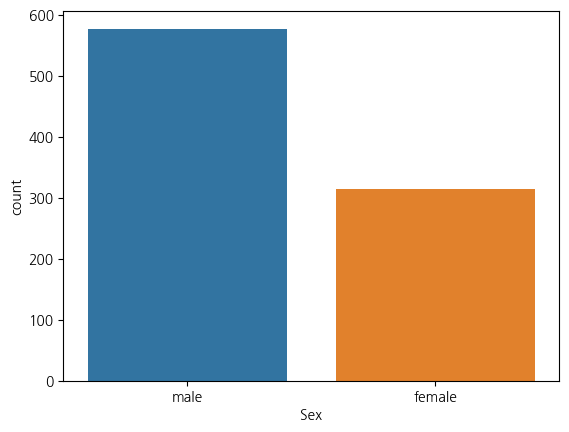

In [18]:
print(data1["Sex"].info())
print(data1["Sex"].value_counts(normalize=True ))
print("--------")
print(data1["Sex"].value_counts())
sns.countplot(x=data1["Sex"],)

### * 남자와 여자의 비가 약 6.5 : 3.5로 나타남

## **4-4 'Age'**
 * 결측치 있음
 * 숫자형임으로 hitogram으로 확인
 * 생존 유무와 연계해서 분석 가능
 * 연령대별로 구입한 티켓의 클래스가 어떤지 분석 가능

177
Axes(0.125,0.11;0.775x0.77)


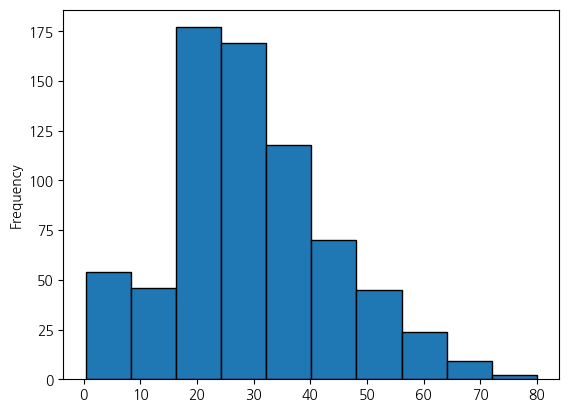

In [19]:
print(data1["Age"].isnull().sum())
print(data1["Age"].plot(kind="hist",edgecolor="black"))

### -2~30대가 가장 많아 보이고 10세 이하의 어린 아이들도 꽤 많이 탑승한 걸로 판단됨

## **4-5 'SibSp' - 같이 탑승한 형제 또는 배우자**
 * 결측치 없음
 * 혼자 탑승한 사람이 대부분인 것으로 확인
 * 'Parch'와 합을 구해서 같이 탑승한 인원 파악 가능

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
na : 0
Axes(0.125,0.11;0.775x0.77)


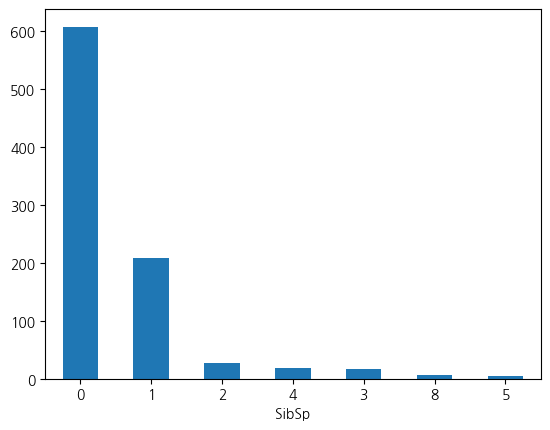

In [20]:
print(data1["SibSp"].value_counts())
print("na : "+ str(data1["SibSp"].isnull().sum()))
print(data1["SibSp"].value_counts().plot(kind="bar",rot=0))

In [21]:
data1[data1["SibSp"]==8] # 성, 탑승 장소, 티켓 값이 같음으로 가족으로 추측할 수 있음 근데 최소 한명이 비는 것 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [22]:
data1[data1["SibSp"]==5] # 성, 탑승 장소, 티켓 값이 같음으로 가족으로 추측할 수 있음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [23]:
data1[data1["SibSp"]==3].sort_values(by="Name") # Fortune 성은 3명, skoong 성은 4명으로 데이터가 완전하지 않은 것 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S


### **같이 탑승한 형제,자매,배우자가 8명이라 적은 사람이 최소 9명 (8명+본인) 이어야 하는 데 7명밖에 없는 것으로 보아 잘못 기록되었을 수 있을 수 있다는 것 인지**

## **4-6 'Parch' - 같이 탑승한 부모 또는 자녀의 수**
 * 결측치 없음
 * 혼자 탑승한 사람이 대부분 

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
---------
na : 0
---------
Axes(0.125,0.11;0.775x0.77)


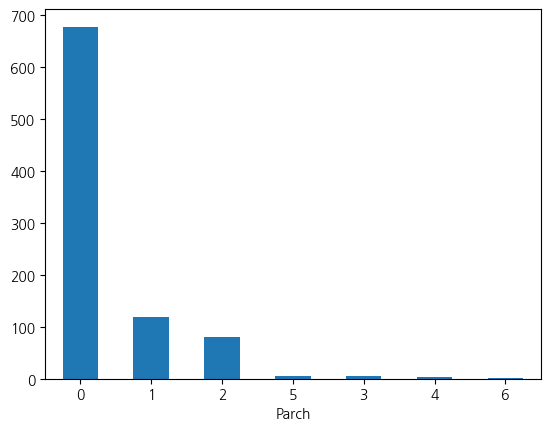

In [24]:
print(data1["Parch"].value_counts())
print("---------")
print("na : "+ str(data1["Parch"].isnull().sum()))
print("---------")

print(data1["Parch"].value_counts().plot(kind="bar",rot=0))

## 4-7 **'Ticket'**
 * 결측치 없음
 * 티켓 번호가 같으면 가족일까?

In [46]:
data1["Ticket"].isna().sum()

0

In [25]:
data1["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [26]:
data1["Ticket"].value_counts().head(20)

Ticket
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
17421           4
349909          4
113760          4
4133            4
113781          4
W./C. 6608      4
2666            4
19950           4
347077          4
C.A. 31921      3
Name: count, dtype: int64

In [27]:
data1[data1["Ticket"]=="347082"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


### ticket 번호가 같은 사람들끼리는 일행(가족)일 가능성이 높다

## **4-8 Fare**
* 0은 사실상 결측치 혹은 이상치로 봐야할지 고민
* 티켓 번호가 같으면 티켓값이 같을까?

In [28]:
data1["Fare"].sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, Length: 891, dtype: float64

In [29]:
data1["Fare"].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [47]:
data1[data1["Fare"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Cabin1
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0,NaN
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0,B94
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0,NaN
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0,NaN
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0,NaN
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0,NaN
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0,NaN
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0,NaN


In [48]:
data1[data1["Fare"]==512.3292] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Cabin1
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0,NaN
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,B51 B53 B55
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0,B101


 -**티켓 값이 0원인 사람들을 뽑아보니 Pclass가 다른 사람들이 골고루 있는 것으로 보아 당시의 시대적 배경, 상황은 알 수 없어 확신할 수 없지만 잘못 기록된 것으로 추측**

## **4-9 Cabin**
* 결측치가 너무 많음
* A,B,C에 따라 티켓 값이 다를까?

In [31]:
data1["Cabin"].unique

<bound method Series.unique of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

## **4-10 Embarked**
 * 결측치 2개 있음
 * S에서 가장 많이 탑승

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
2


<Axes: xlabel='Embarked', ylabel='count'>

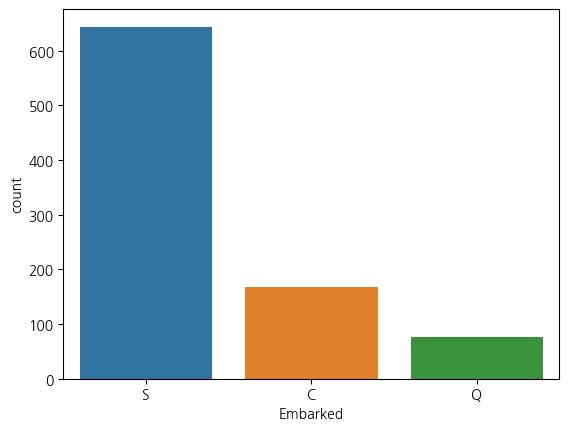

In [32]:
print(data["Embarked"].value_counts())
print(data["Embarked"].isnull().sum())
sns.countplot(x=data["Embarked"])

# **5. 변수들끼리 연계해서 보기**

## **5-1 SibSp, Parch 합치기 -> family 변수 생성** 

In [33]:
data1["family"]=data1["SibSp"]+data1["Parch"]

In [34]:
data1["family"].value_counts()

family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

## **5-2 groupby로 Pclass 별로 값들 확인**
 * 호실 등급별 인당 평균 비용 계산
 * 호실 등급별 탑승지 분석 -> S탑승지가 제일 많다

In [35]:
print("인당 평균 비용")
print(data1.groupby("Pclass")["Fare"].mean())


인당 평균 비용
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

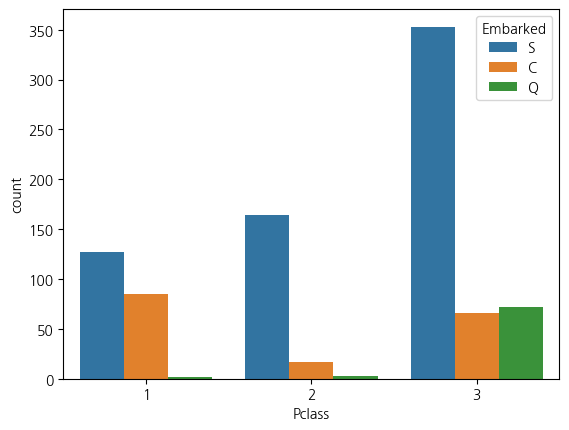

In [161]:
sns.countplot(x="Pclass",hue="Embarked",data=data1)

##  **5-3티켓번호가 같은 사람중에 요금이 다른 사람이 있나 확인**

In [36]:
ticket_diff=data1.groupby("Ticket")["Fare"].max()-data1.groupby("Ticket")["Fare"].min()
ticket_diff[ticket_diff!=0]


Ticket
7534    0.6291
Name: Fare, dtype: float64

### 
    * 티켓 번호가 같은 사람들은 요금이 다 같다 -> 잘 기록되었다
    * 0원으로 기록된 티켓을 산 사람들은 모두 0원으로 기록
    * class별로 0원으로 기록된 사람들이 비슷함으로 전에 class별 요금 계산할 때 별 영향 없었을거라 예측

In [37]:
data_free=data1[data1["Fare"]==0]
data_free["Pclass"].value_counts()

Pclass
2    6
1    5
3    4
Name: count, dtype: int64

## **5-4 배정된 방과 class의 관계 분석**
 * Cabin에서 결측치가 있는 행 제거 -> data2에 담기
 * 객실 알파벳 별로 구분하기 쉽게 새로 "room"이라는 변수 생성
 * 객실은 A부터 G까지 있고 T는 특별실인지 잘 모르겠음
 * B,C로 시작하는 객실이 1등석이 많고 티켓값의 평균이 높은걸로 보아 이 두개가 좋은 객실일 것으로 추정

In [ ]:
data2=data1.copy()

In [105]:
print(data2["Cabin"].sort_values(ascending=True))
data2[data2["Cabin"]=="T"]

583    A10
475    A14
556    A16
284    A19
599    A20
      ... 
394     G6
10      G6
205     G6
251     G6
339      T
Name: Cabin, Length: 204, dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Cabin1,room
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,0,T,


In [110]:

print(data2["Cabin"].isnull().sum())
data2=data2[data2["Cabin"].isnull()==False]
data2["room"]=""
data2.loc[data2["Cabin"].str.startswith("A"),"room"]="A"
data2.loc[data2["Cabin"].str.startswith("B"),"room"]="B"
data2.loc[data2["Cabin"].str.startswith("C"),"room"]="C"
data2.loc[data2["Cabin"].str.startswith("D"),"room"]="D"
data2.loc[data2["Cabin"].str.startswith("E"),"room"]="E"
data2.loc[data2["Cabin"].str.startswith("F"),"room"]="F"
data2.loc[data2["Cabin"].str.startswith("G"),"room"]="G"
data2.loc[data2["Cabin"].str.startswith("T"),"room"]="T"
print(data2["room"].value_counts())
data2["room"].describe()

0
room
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


count     204
unique      8
top         C
freq       59
Name: room, dtype: object

<Axes: xlabel='Pclass', ylabel='count'>

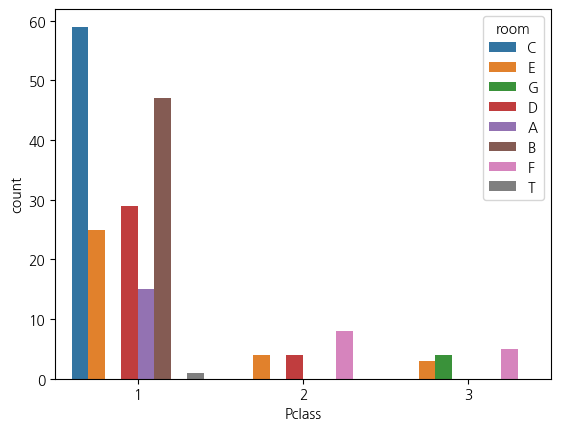

In [111]:
sns.countplot(x="Pclass",hue="room",data=data2)

In [113]:
data2.groupby("room")["Fare"].mean()

room
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
T     35.500000
Name: Fare, dtype: float64

## **5-5 survived과 연계하기**
 * data1의 copy본을 data3에 담음
 * survived를 str로 바꾼 sur1 변수 생성
 * Pclass와 비교 -> 높은 클래스일 수록 생존 비율 높음
 * 여성의 생존 비율이 더 높음
 * 생존자 그룹 -> data_alive, 사망자 그룹 -> data_death로 나눔
 * 두 그룹의 연령 분포는 비슷하지만 생존자 그룹의 경우 영유아(10세 이하의 비율이 높음)
 * 각 객실동(data2의 "room"기준) 생존자 수, 생존비율 계산 -> A동의 비율이 가장 낮으며 B,D,E동의 비율이 높다 

In [114]:
data1["Survived"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [124]:
data3=data1.copy()
data3["Sur1"]=data3["Survived"].astype("str")


<Axes: xlabel='Pclass', ylabel='count'>

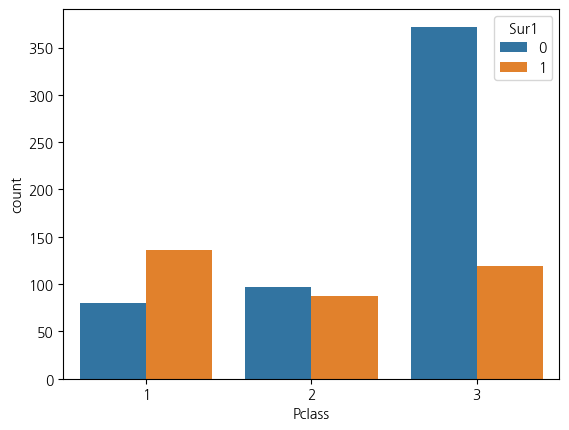

In [125]:
sns.countplot(x="Pclass",hue="Sur1",data=data3)

<Axes: xlabel='Sex', ylabel='count'>

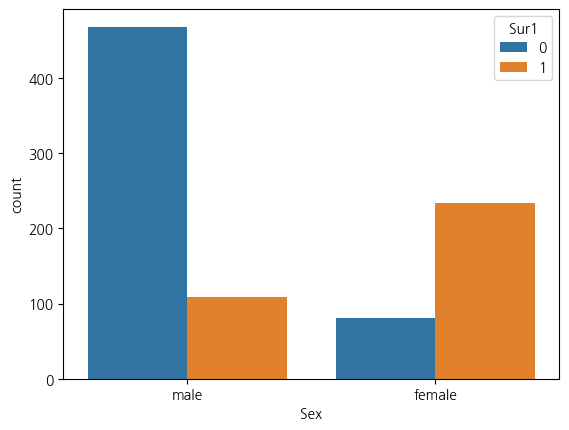

In [126]:
sns.countplot(x="Sex",hue="Sur1",data=data3)

Axes(0.125,0.11;0.775x0.77)


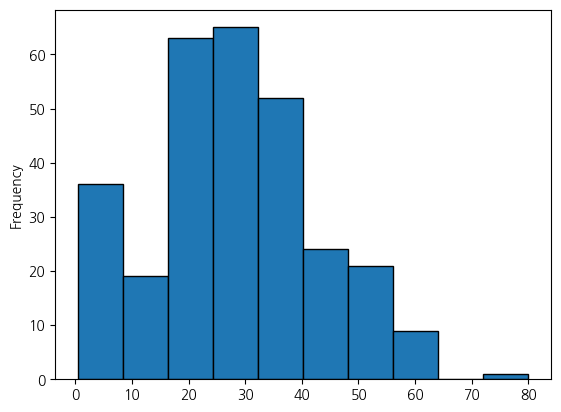

In [155]:
data_alive=data3[data3["Sur1"]=="1"]
data_death=data3[data3["Sur1"]=="0"]
print(data_alive["Age"].plot(kind="hist",edgecolor="black") )

Axes(0.125,0.11;0.775x0.77)


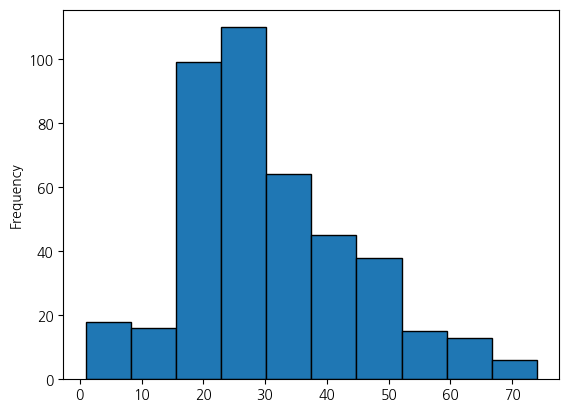

In [156]:
print(data_death["Age"].plot(kind="hist",edgecolor="black"))

Axes(0.125,0.11;0.775x0.77) Axes(0.125,0.11;0.775x0.77)


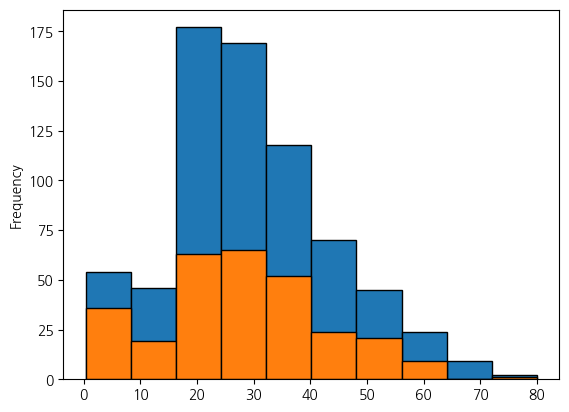

In [157]:
print(data3["Age"].plot(kind="hist",edgecolor="black"),data_alive["Age"].plot(kind="hist",edgecolor="black") )

-**영유아의 생존비율이 높다**

In [158]:
print(data2.groupby("room")["Survived"].sum())
print(data2.groupby("room")["Survived"].count())
print( data2.groupby("room")["Survived"].sum() / data2.groupby("room")["Survived"].count()  )

room
A     7
B    35
C    35
D    25
E    24
F     8
G     2
T     0
Name: Survived, dtype: int64
room
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: Survived, dtype: int64
room
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64


- **B,D,E동의 생존비율이 높은것으로 탈출구 혹은 구명보트와 위치가 가까웠을 것이라 추측가능**